## Laboratory 4 :POL RIBA MOSOLL (20179725) & JORDI SEGURA PONS (2128790)


In [ ]:
# Firstly, we import the needed libraries

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import math as math
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

%matplotlib inline

## 1 - Equality constraints: KKT conditions

### Proposed Experiments

#### 1. Consider $\alpha^k = 1$ and iteratively update the current point to obtain the next optimal point. 

We define all the functions, gradients and hessians we will need during the laboratory.

In [ ]:
def f(x1, x2):

    return np.exp(3*x1) + np.exp(-4*x2)

def g(x1, x2):

    return x1**2 + x2**2 - 1

def gradient_f(x1, x2):

    return np.matrix([3*np.exp(3*x1), -4*np.exp(-4*x2)])

def gradient_g(x1, x2):

    return np.matrix([2*x1, 2*x2])

def hessian_f(x1, x2):

    return np.matrix([[9*np.exp(3*x1),0], [0,16*np.exp(-4*x2)]])
    
def hessian_g(x1, x2):
  
    return np.matrix([[2, 0], [0, 2]])
    

Firstly, let's follow the instructions given by the enunciate.

We compute the gradient of functions $f$ and $g$ at the initial point x0:

In [ ]:
lambda_0 = -1
x0 = np.matrix([-1, 1])
print(gradient_f(x0[0, 0], x0[0, 1]))
print(gradient_g(x0[0, 0], x0[0, 1]))

[[ 0.14936121 -0.07326256]]
[[-2  2]]


We compute the gradient of the Lagrangian at the x0:

In [ ]:
Gradient_Lag = gradient_f(x0[0, 0], x0[0, 1]) - lambda_0 * gradient_g(x0[0, 0], x0[0, 1])
Gradient_Lag

matrix([[-1.85063879,  1.92673744]])

We compute the hessian of $f$ at x0:

In [ ]:
hessian_f(x0[0, 0], x0[0, 1])

matrix([[0.44808362, 0.        ],
        [0.        , 0.29305022]])

We compute the hessian of $g$ at x0:

In [ ]:
hessian_g(x0[0, 0], x0[0, 1])

matrix([[2, 0],
        [0, 2]])

We compute the hessian of the Lagrangian at x0:

In [ ]:
hessian_f(x0[0, 0], x0[0, 1])-lambda_0*hessian_g(x0[0, 0], x0[0, 1])

matrix([[2.44808362, 0.        ],
        [0.        , 2.29305022]])

Let's now create the matrices of the linear system to solve:

In [ ]:
M1 = hessian_f(x0[0, 0], x0[0, 1]) - lambda_0*hessian_g(x0[0, 0], x0[0, 1])
M2 = - gradient_g(x0[0, 0], x0[0, 1])
M_aux = np.concatenate((M1, M2.T), axis=1)
Matrix = np.concatenate((M_aux, np.concatenate((M2, [[0]]), axis=1)), axis=0)
Matrix

matrix([[ 2.44808362,  0.        ,  2.        ],
        [ 0.        ,  2.29305022, -2.        ],
        [ 2.        , -2.        ,  0.        ]])

In [ ]:
Residuals = np.concatenate((-Gradient_Lag, [[g(x0[0,0], x0[0,1])]]), axis = 1).T
Residuals

matrix([[ 1.85063879],
        [-1.92673744],
        [ 1.        ]])

We solve the linear system:

In [ ]:
Solution = np.linalg.solve(Matrix, Residuals)
Solution

matrix([[ 0.22577436],
        [-0.27422564],
        [ 0.64896214]])

We update the point and $\lambda$ with the results obtained by the solution:

In [ ]:
X = x0 + Solution[0:2,0]
Lambda = lambda_0 + Solution[2,0]
print(X)
print(Lambda)

[[-0.77422564  1.22577436]
 [-1.27422564  0.72577436]]
-0.351037859248437


The results we obtained in the last exercise are the same as the given in the description of the problem.
After 1 iteration of the process, let's build up the function to compute the iterative algorithm.

In [ ]:
# Function to compute the iterative algorithm

def Optimization(x0 = np.matrix([-1, 1]), lambda0 = -1, Iter = 100):

    CountIter = 0

    while CountIter < Iter:

        Gradient_Lag = gradient_f(x0[0, 0], x0[0, 1]) - lambda0 * gradient_g(x0[0, 0], x0[0, 1])
        Hessian_Lag = hessian_f(x0[0, 0], x0[0, 1]) - lambda0 * hessian_g(x0[0, 0], x0[0, 1])
        M1 = hessian_f(x0[0, 0], x0[0, 1]) - lambda0 * hessian_g(x0[0, 0], x0[0, 1])
        M2 = - gradient_g(x0[0, 0], x0[0, 1])
        M_aux = np.concatenate((M1, M2.T), axis=1)
        Matrix = np.concatenate((M_aux, np.concatenate((M2, [[0]]), axis=1)), axis=0)
        Results = np.concatenate((-Gradient_Lag, [[g(x0[0,0], x0[0,1])]]), axis = 1).T
        Solution = np.linalg.solve(Matrix, Results)
        x0 = x0 + Solution[0:2,0].T
        lambda0 = lambda0 + Solution[2,0]

        if np.linalg.norm(Gradient_Lag) < 10**-6:

            break

        CountIter = CountIter + 1
        
    return CountIter, x0

In [ ]:
Optimization(x0 = np.matrix([-1, 1]), Iter = 100)

(4, matrix([[-0.74833549,  0.66332043]]))

As it can be seen in the results above, the function "Optimization" prints us the number of iterations computed and the solution. 
As the solution matches with the suggested on the pdf file using the point (-1, 1) as the initial point, we will conclude that we did it correctly.
It reached the optimal solution in 4 iterations, which means the function is very efficient.

#### 2. Perform some experiments with starting points that are farther away of the optimal solution

In [ ]:
points = [[8, 2], [-5, 3], [-10, 0], [2, 4], [-4, -5]]

for p in points:
  
    solution_1 = Optimization(x0 = np.matrix(p), Iter = 100)
    print('\nInitial point (x0): ' + str(p) + '\nSolution: ' + str(solution_1[1]) + '\nNumber of iterations: ' + str(solution_1[0]))


Initial point (x0): [8, 2]
Solution: [[nan nan]]
Number of iterations: 100

Initial point (x0): [-5, 3]
Solution: [[-0.74833549  0.66332043]]
Number of iterations: 6

Initial point (x0): [-10, 0]
Solution: [[-0.74833549  0.66332043]]
Number of iterations: 7

Initial point (x0): [2, 4]
Solution: [[-0.74833549  0.66332043]]
Number of iterations: 12

Initial point (x0): [-4, -5]
Solution: [[ 0.91041323 -0.41370006]]
Number of iterations: 18


The results above show that when taking points which are close to the solution, the algorithm provides the solution (some times more efficiently than others), but when we try with further points, the function struggles to find the solution, even after 100 iterations (which is the upper treshold we setted up). In one of the points the function gets lost, and ends up a fake solution.

#### 3. Implement Merit function with $\rho = 10$ and perform classical gradient descent to find an approximation to the solution we are looking for. Observe if you arrive near to the optimal solution of the problem. (You may have numerical problems with the gradient, normalize it at each iteration)

We will now implement a code to run the Merit function with $\rho = 10$

In [ ]:
def Merit(x, y):
  
    return f(x, y) + 10 * g(x, y)**2

In [ ]:
def gradient_Merit(x, y):
  
    return np.matrix([gradient_f(x,y)[0,0] + 10*gradient_g(x,y)[0,0], gradient_f(x,y)[0,1] + 10*gradient_g(x,y)[0,1]])

In [ ]:
def gradient_descent_Merit(f, point0x = 0.0, point0y = 0.0, max_iters = 100, treshold = 10**-3):

    sol = np.matrix([point0x , point0y])
    f_value = f(sol[0,0], sol[0,1])
    steps = np.matrix(sol)

    for i in range(max_iters):

        alpha = 1
        sol_aux = sol - alpha * gradient_Merit(sol[0,0], sol[0,1]) / np.linalg.norm(gradient_Merit(sol[0,0], sol[0,1]))
        
        while(f(sol_aux[0,0], sol_aux[0,1]) > f(sol[0,0], sol[0,1])):

            alpha = alpha / 2
            sol_aux = sol - alpha * gradient_Merit(sol[0,0], sol[0,1])

        if (f(sol[0,0], sol[0,1]) - f(sol_aux[0,0], sol_aux[0,1])) < treshold:
            
            i -= 1

            return sol
            
        sol = sol_aux.copy()
        steps = np.vstack([steps, sol])
        f_value = f(sol[0,0], sol[0,1])   
    
    return sol

In [ ]:
gradient_descent_Merit(Merit, point0x = 10, point0y = -20, max_iters = 100, treshold = 10**-3)

matrix([[-0.47569926,  0.70337619]])

In [ ]:
gradient_descent_Merit(Merit, point0x = 15, point0y = -17, max_iters = 100, treshold = 10**-15)

matrix([[-0.23657222,  0.49839641]])

The algorithm works correctly for only one of the examples. The solution is not exact but approximately correct, with a small bias to the real solution.
To find a good initial point for the "Optimization" algorithm, we can use the merit function, while penalizing infeasibility
Therefore, using a merit function where we penalize a lot infeasibility is a good method to find a good initial point for the previous algorithm.
Let's see how it works to use these points as intial points in the following section. 

#### 4. Implement first the Merit function to get an approximation of the point we are looking for and after that solution is found, use the Newton-based method to find the optimal solution.

Now, we will mix the Merit function and the Newton method, choosing the points accordingly to the gradient descent method applied on the merit function. Then, we will use the "Optimization" algorithm to find the real solution of the optimization problem.

In [ ]:
def Optimization_Upgrade(Merit, x0 = np.matrix([10, -20]), lambda0 = -1, Iter = 100):

    x0 = gradient_descent_Merit(Merit, point0x = x0[0,0], point0y = x0[0,1], max_iters = Iter, treshold = 10**-3)
    sol = Optimization(x0 = x0, Iter = Iter)
    
    return x0, sol

In [ ]:
Optimization_Upgrade(Merit, x0 = np.matrix([35, 55]))

(matrix([[-0.10770015,  0.49801159]]),
 (8, matrix([[-0.74833549,  0.66332043]])))

With the initial point (35, 55) the algorithm provides us the correct solution:
It also provides us witth the number of iterations, starting points and approximated solution.

In [ ]:
# Let's try ow with more values:

points2 = [[8, 2], [-5, 3], [-10, 0], [2, 4], [-4, -5]]

for p in points2:
  
    sol = Optimization_Upgrade(Merit, x0 = np.matrix(p), Iter = 100)
    print('\nInitial point: ' + str(p) + '\nInitial point found using gradient descent on Merit function: ' + str(sol[0]) + '.\nSolution: ' + str(sol[1][1]))


Initial point: [8, 2]
Initial point found using gradient descent on Merit function: [[-0.09438169  0.54630267]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [-5, 3]
Initial point found using gradient descent on Merit function: [[-0.71157791  0.4291198 ]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [-10, 0]
Initial point found using gradient descent on Merit function: [[-0.99118837  0.12044943]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [2, 4]
Initial point found using gradient descent on Merit function: [[-0.06639242  0.87001063]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [-4, -5]
Initial point found using gradient descent on Merit function: [[-0.68096553  0.11910219]].
Solution: [[-0.74833549  0.66332043]]


All the close points found the right solution, because the merit function gives as a good point to start. Therefore, the merit function has improved the performance of our algorithm.

We should now try with farther points.

In [ ]:
# Let's try out with more values, this time a little bit futher from the solution:

points3 = [[20, -20], [15, 26], [-10, -14], [7.5, 23], [-33, -50]]

for p in points3:
  
    sol = Optimization_Upgrade(Merit, x0 = np.matrix(p), Iter = 100)
    print('\nInitial point: ' + str(p) + '\nInitial point found using gradient descent on Merit function: ' + str(sol[0]) + '.\nSolution: ' + str(sol[1][1]))


Initial point: [20, -20]
Initial point found using gradient descent on Merit function: [[-0.78751718  0.05261548]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [15, 26]
Initial point found using gradient descent on Merit function: [[-0.10576867  0.64097129]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [-10, -14]
Initial point found using gradient descent on Merit function: [[-0.50789955  0.12188894]].
Solution: [[ 0.91041323 -0.41370006]]

Initial point: [7.5, 23]
Initial point found using gradient descent on Merit function: [[-0.10143924  0.94261223]].
Solution: [[-0.74833549  0.66332043]]

Initial point: [-33, -50]
Initial point found using gradient descent on Merit function: [[-0.9821518   0.12123287]].
Solution: [[-0.74833549  0.66332043]]


Again, we prove that this method works even with very far points, with a very small bias compared to the real solution.
Therefore, we can say it is a good method to use.

# Optional: Minimizing the force applied to an object.

In this exercise, as it has been stated in class, we will make use of the Hamiltonian in order to find the minimum force we have to apply to an object to move it from position $x_0$ to $x_1$ in $T$ seconds.

First of all, we need to declare the function and its physical restrictions, such that:

$F=m \cdot x^{\prime\prime} = m \cdot v^{\prime} = u$

$\begin{align*}
x^\prime &= v \\
v' &= \frac{u}{m}
\end{align*}
$

Once here, we need to build our Hamiltonian, which is compressed with the cost function we want to reduce, or minimize,($u$) and the constraints:

$H = |u|^2 + \lambda_1 v + \lambda_2 \frac{u}{m}$

Now, with the Hamiltonian in our hands, we need to minimize it to find the desired force. Hence:

$\frac{\partial H}{\partial u} = 0 \mapsto 2u + \lambda_2 \frac{1}{m} = 0 \mapsto u = -\lambda_2 \frac{1}{2m}$

As we are considering these constraints in our whole system, we also need to derivate them:

$\lambda_1^\prime = -\frac{\partial H}{\partial x} = 0 \mapsto \lambda_1 = k$

$\lambda_2^\prime = -\frac{\partial H}{\partial v} = -\lambda_1 \mapsto \lambda_2 = -kt + c $

Then, if we substitute these values in the previous expression of our $u$, we get:
$u(t) = -\lambda_2 \frac{1}{2m} = \frac{kt - c}{2m}$

Therefore, integrating this function, we are able to find $v(t)$ and $x(t)$:

$
\begin{align*}
v(t) &= \int \frac{u(t)}{m} \, \mathrm{d}t = \frac{1}{2m^2} \int kt - c \, \mathrm{d}t \\
&= \frac{1}{2m^2} \left( \frac{1}{2} kt^2 - ct \right) + C
\end{align*}
$

$\begin{align*}
x(t) &= \int \left( \frac{1}{2m^2} \left( \frac{1}{2} kt^2 - ct \right) + C \right) \, \mathrm{d}t \\
&= \frac{1}{2m^2} \int \left( \frac{1}{2} kt^2 - ct + C \right) \, \mathrm{d}t + \int C \, \mathrm{d}t \\
&= \frac{1}{2m^2} \left( \frac{1}{6} kt^3 - \frac{1}{2} ct^2 +Ct \right) + C'
\end{align*}
$

And finally, we can evaluate at the boundaries established in class, which were using $T=1$ and we know the final position is also equal to 1. 

$
\begin{align*}
x(0) &= \frac{1}{2m^2} \left( \frac{1}{6} k(0)^3 - \frac{1}{2} c(0)^2 \right) + C' = 0  &\mapsto C'=0\\
x(1) &= \frac{1}{2m^2} \left( \frac{1}{6} k(1)^3 - \frac{1}{2} c(1)^2 + C \right) + C' = 1 &\mapsto \frac{1}{2m^2} \left( \frac{k}{6}- \frac{c}{2} +C \right ) = 1\\
v(0) &= \frac{1}{2m^2} \left( \frac{1}{2} k(0)^2 - c(0) \right) + C = 0 &\mapsto C = 0\\
v(1) &= \frac{1}{2m^2} \left( \frac{1}{2} k(1)^2 - c(1) \right) + C = 0 &\mapsto \frac{1}{2m^2} \left( \frac{k}{2}- c \right ) = 0 &\mapsto c = \frac{k}{2}
\end{align*}
$

$
\begin{align*}
\frac{1}{2m^2} \left( \frac{k}{6} - \frac{k}{4} \right) - 1 &= 0 \\
\frac{1}{2m^2} \cdot \frac{-k}{12} - 1 &= 0 \\
k &= -24m^2
\end{align*}
$

So, finallly:

$u(t) = \frac{kt - c}{2m} =\frac{-24m^2t}{2m} + \frac{12m^2}{2m} = -12mt + 6m $




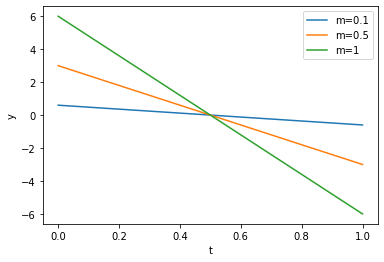

In [2]:
import matplotlib.pyplot as plt
import numpy as np

m = [0.1, 0.5, 1]
t = np.arange(0, 1.01, 0.01)

for i in range(len(m)):
    y = [-12 * m[i] * x + 6 * m[i] for x in t]
    plt.plot(t, y, label=f'm={m[i]}')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


This plot shows us the different force we need to apply at each second depending on the mass we must move from position $x_0$ to $x_1$ in 1 second!